In [1]:
from image_encoder import VitEncoder
from pymilvus import MilvusClient
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

vit = VitEncoder.create()
client = MilvusClient(uri="http://localhost", port="19530", user = "", password = "")

### Query Image

Query face:


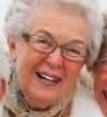

Top 3 matched faces:


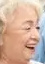

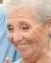

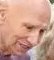

In [2]:

def face_top_n(fp:str, top = 3):
    im = np.array(Image.open(fp).convert('RGB'))
    query_vec = vit(im)
    print("Query face:")
    display(Image.open(fp))
    results = client.search(
        "faces",
        data=[query_vec],
        output_fields=["crop_path"],
        search_params={"metric_type": "COSINE"},
    )
    n = 0 
    
    print("Top {} matched faces:".format(top))
    for r in results:
        for t in r:
            n += 1
            display(Image.open(t['entity']['crop_path']))
            if n == top:
                break
    plt.show()
    
query_image_path = '/Users/wanghuan/Projects/cv_projects/whereis/query_images/old_face.png'
face_top_n(query_image_path, 3)